**Credit Score Classification Prediction**

In [ ]:
# Loading the import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# checking the version we are using of these libraries
print("Numpy --> ", np.__version__)
print("Pandas --> ", pd.__version__)
print("Sklearn --> ", sklearn.__version__)
print("Seaborn --> ", sns.__version__)

Numpy -->  1.26.4
Pandas -->  2.1.4
Sklearn -->  1.3.2
Seaborn -->  0.13.1


In [ ]:
# Loading the dateset
df= pd.read_csv('/content/train.csv',na_values=['NaN',np.NaN])
df.sample(5)

<ipython-input-208-270947645192>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/train.csv',na_values=['NaN',np.NaN])


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
59866,0x174c8,CUS_0x9e11,March,Moonj,43,655-69-5918,Developer,17535.57,1628.297500,4,...,Standard,2476.35,34.666377,14 Years and 7 Months,Yes,28.678837,39.728613062373384,Low_spent_Large_value_payments,364.42230010674035,Poor
98083,0x254b5,CUS_0x4fb1,April,NaN,21,157-31-1348,Developer,18289.68_,1305.140000,6,...,Bad,4266.37,29.997278,2 Years and 6 Months,Yes,99.102924,39.09549344173092,Low_spent_Medium_value_payments,272.3155827218116,Poor
76667,0x1d739,CUS_0x741,April,Leilai,21,232-53-6053,Media_Manager,122566.59,10323.882500,0,...,Good,889.69,31.179864,17 Years and 7 Months,No,0.000000,1326.512632125779,Low_spent_Small_value_payments,NaN,Good
46113,0x12433,CUS_0x4a82,February,Dhanya Skariachanu,45_,711-75-2709,Developer,21426.07,1511.505833,5,...,Standard,1024.27,23.589854,15 Years and 2 Months,Yes,117.266787,23.551026516763,High_spent_Large_value_payments,250.33277027976868,Standard
92411,0x23379,CUS_0x7789,April,Sarahr,26,013-57-4539,Scientist,10882.8,NaN,4,...,Good,1452.88,41.323916,26 Years and 5 Months,NM,19.162088,18.412095715862964,Low_spent_Large_value_payments,297.1158167592416,Good


In [ ]:
# getting the shape of data
df.shape

(100000, 28)

In [ ]:
# information of missing values and datatype of features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# checking the unique values in the dataset
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
# values in our target variable
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
# selecting some rows from the dataset which is useful
df.drop(['ID','Customer_ID','Name','Age','SSN','Month','Credit_Mix'],axis=1,inplace=True)

Cleaning the data

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', np.nan)
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('-', '')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '0')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '0')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')

In [ ]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0).astype(np.int64,copy=True)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0).astype(np.int64,copy=True)
df['Annual_Income'] = df['Annual_Income'].astype(np.float64,copy=True)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(np.int64,copy=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(np.float64,copy=True)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(np.float64,copy=True)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(np.float64,copy=True)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(np.float64,copy=True)
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace=True)

In [ ]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Type_of_Loan              88592 non-null   object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [ ]:
# removing the duplicate rows
df = df.drop_duplicates()
df.shape

(100000, 21)

In [ ]:
df.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Filling the missing values

In [ ]:
df.isnull().sum()

,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408
Delay_from_due_date,0
Num_of_Delayed_Payment,0


In [ ]:
df.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,28.758090,10.171791,27.208880,1426.220376,32.285173,1403.118217,637.412998,-3.088580e+22
std,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,218.117625,6.880628,191.308723,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+24
min,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,8.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.699858e+02
50%,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,13.000000,9.250000,5.000000,1166.155000,32.305784,69.249473,135.925682,3.364493e+02
75%,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696405e+02
max,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [ ]:
# filling the missing values
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0],inplace=True)
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(),inplace=True)
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean(),inplace=True)
df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Type_of_Loan              88592 non-null   object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

Data Visualization

Univariate Analysis

<Axes: xlabel='Credit_Score', ylabel='count'>

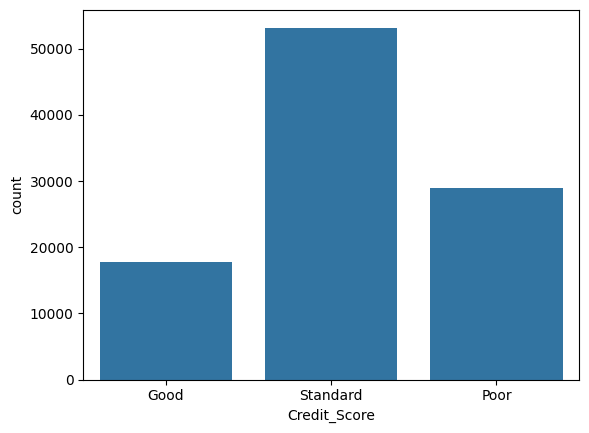

In [ ]:
# seeing the frequency of categorical data in dataset
sns.countplot(df, x='Credit_Score')

<Axes: ylabel='count'>

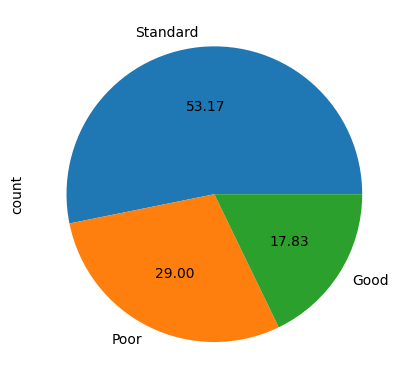

In [ ]:
# seeing in terms of percentage
df['Credit_Score'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Occupation'>

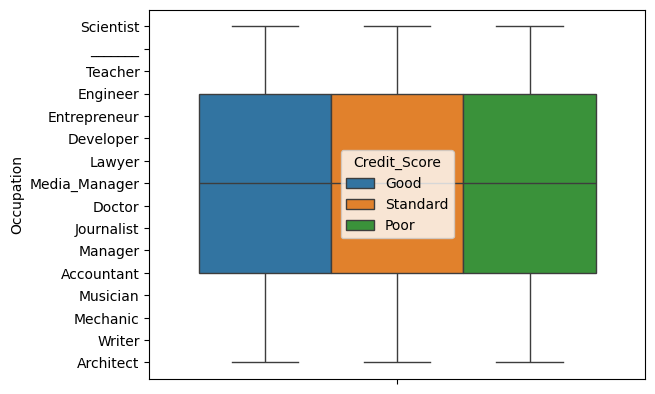

In [ ]:
sns.boxplot(data=df,y='Occupation', hue='Credit_Score')

In [ ]:
df.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<ipython-input-246-91514c5d31e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Credit_Score']=='Standard']['Amount_invested_monthly'], hist=False)
<ipython-input-246-91514c5d31e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Credit_Score']=='Poor']['Amount_

<Axes: xlabel='Amount_invested_monthly', ylabel='Density'>

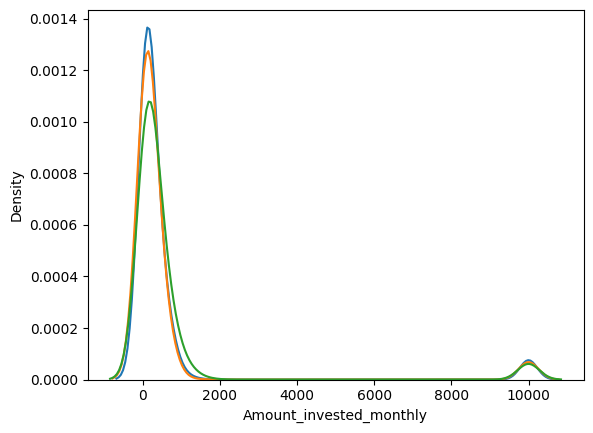

In [ ]:
sns.distplot(df[df['Credit_Score']=='Standard']['Amount_invested_monthly'], hist=False)
sns.distplot(df[df['Credit_Score']=='Poor']['Amount_invested_monthly'], hist=False)
sns.distplot(df[df['Credit_Score']=='Good']['Amount_invested_monthly'], hist=False)

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

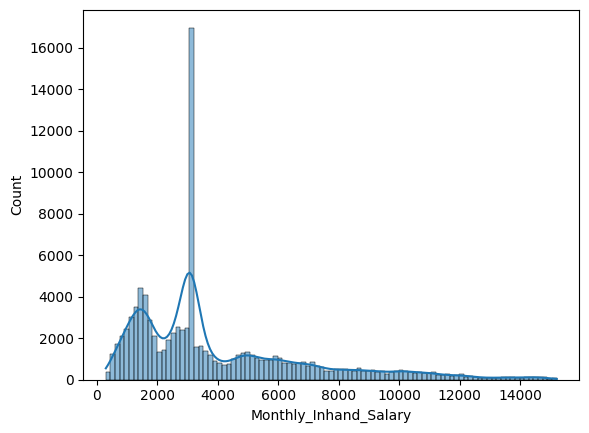

In [ ]:
sns.histplot(df['Monthly_Inhand_Salary'], kde=True)

(array([25019., 34661., 10600., 10365.,  6777.,  4487.,  3718.,  2420.,
         1046.,   907.]),
 array([  303.64541667,  1793.74420833,  3283.843     ,  4773.94179167,
         6264.04058333,  7754.139375  ,  9244.23816667, 10734.33695833,
        12224.43575   , 13714.53454167, 15204.63333333]),
 <BarContainer object of 10 artists>)

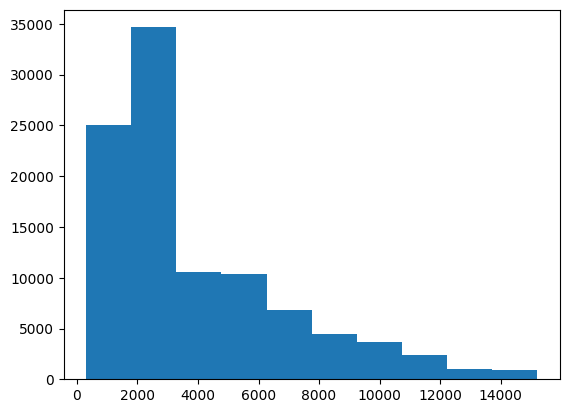

In [ ]:
plt.hist(df['Monthly_Inhand_Salary'],bins=10)

<Axes: xlabel='Annual_Income', ylabel='Outstanding_Debt'>

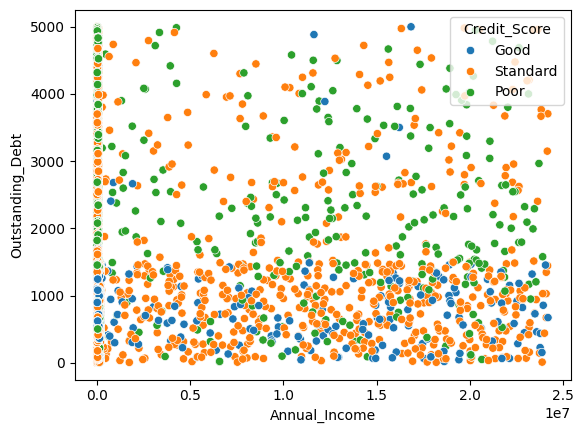

In [ ]:
sns.scatterplot(x=df['Annual_Income'], y=df['Outstanding_Debt'],hue=df['Credit_Score'])

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

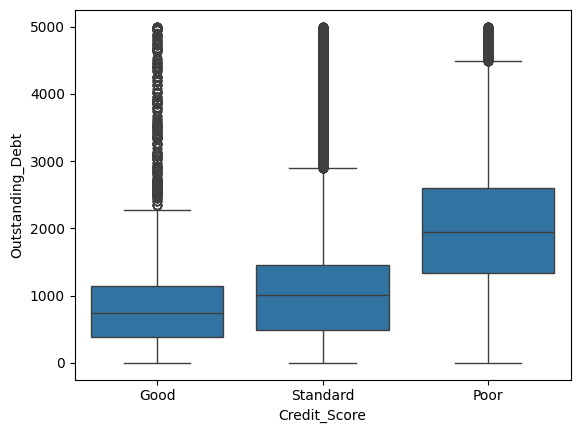

In [ ]:
sns.boxplot(x = df['Credit_Score'], y = df['Outstanding_Debt'])

<Axes: xlabel='Amount_invested_monthly', ylabel='Annual_Income'>

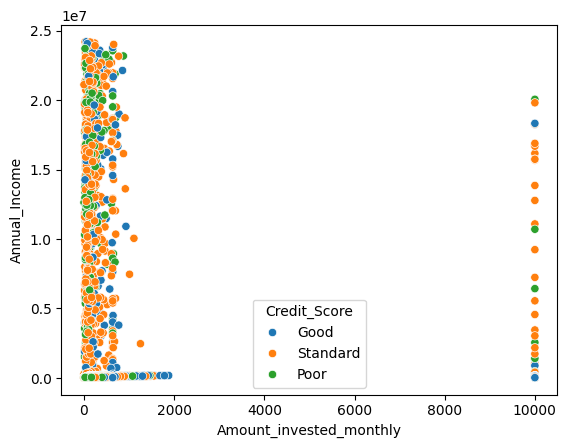

In [ ]:
sns.scatterplot(x=df['Amount_invested_monthly'], y=df['Annual_Income'],hue=df['Credit_Score'])

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

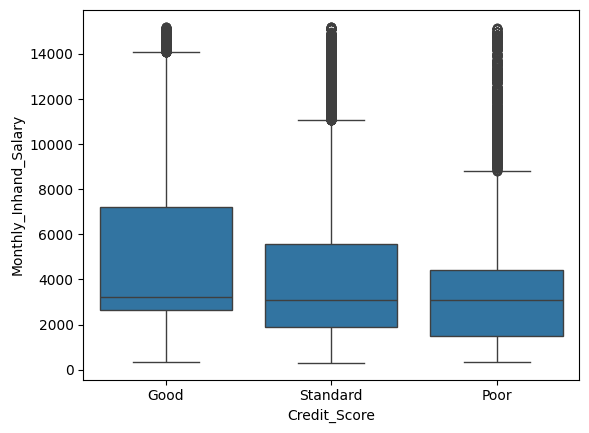

In [ ]:
sns.boxplot(x = df['Credit_Score'], y = df['Monthly_Inhand_Salary'])

Removing the outliers

In [ ]:
Q1 = df['Monthly_Inhand_Salary'].quantile(0.25)
Q3 = df['Monthly_Inhand_Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Monthly_Inhand_Salary'] >= upper)[0]
lower_array = np.where(df['Monthly_Inhand_Salary'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [ ]:
df.shape

(95635, 21)

Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
X = np.array(df[['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts',
                'Num_Credit_Card','Interest_Rate','Num_of_Loan',
                'Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
                'Monthly_Balance']])
Y = np.array(df['Credit_Score'])

# changing the X and Y to dataframe
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# 'Type_of_Loan','Credit_History_Age',

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print(X_train)

[[-0.09847508 -0.5261489  -0.14655051 ... -0.13255217 -0.30712623
   0.00996327]
 [-0.10787174 -0.87612757 -0.12102506 ... -0.10951564 -0.87935632
   0.00996327]
 [-0.09050794 -0.05613106 -0.12953354 ... -0.11873025 -0.58069545
   0.00996327]
 ...
 [-0.11013864 -0.23072813 -0.14655051 ... -0.09108641 -1.06904136
   0.00996327]
 [-0.08154253 -0.23072813 -0.06146569 ... -0.05422796  0.24542933
   0.00996327]
 [-0.04662399  2.11075339 -0.07848266 ... -0.05422796 -1.17173572
   0.00996327]]


In [ ]:
print(Y_train)

              0
65492      Poor
84815      Good
66875  Standard
21020      Good
61143  Standard
...         ...
6265   Standard
54886  Standard
76820      Good
860        Poor
15795      Poor

[66944 rows x 1 columns]


In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
print(Y_test)
# 1 --> Poor
# 0 --> Good
# 2 --> Standard

[1 0 2 ... 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=150)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.773482973754836
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      4892
           1       0.77      0.79      0.78      8434
           2       0.79      0.80      0.79     15365

    accuracy                           0.77     28691
   macro avg       0.76      0.75      0.76     28691
weighted avg       0.77      0.77      0.77     28691



Saving the model

In [ ]:
import pickle

filename = 'credit_score_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('credit_score_model.sav', 'rb'))